<a href="https://colab.research.google.com/github/Vihimuro/MDAEL8/blob/main/minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

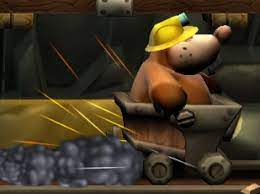

# Mineração de Dados


Alunos: Tiago Júnio Tegon Nascimento e Vinícius Himuro Augusto

Githubs: https://github.com/TiagoTegon/MDAEL8.git e https://github.com/Vihimuro/MDAEL8

Database escolhida: Congressional Voting Records Data Set

link: https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

 # Atividade 1 - Pré-processamento de dados

## Avaliação das características

### Problema a ser investigado

A base de dados possui o posicionamento (a favor ou contra) de senadores sobre alguns assuntos politicos (atributos) e, a partir deles, identificar se uma pessoa analisada integra o partido republicano ou democrata.

Avalie as características da base de dados: problema a ser
investigado, número de amostras, número de atributos, tipos de
atributos, possui valores ausentes?

### Número de amostras

435 amostras, dos quais 267 são democratas e 168 republicanos.

### Atributos

São ao todo 17 atributos booleanos, sendo eles: 


   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
   10. mx-missile: 2 (y,n)
   11. immigration: 2 (y,n)
   12. synfuels-corporation-cutback: 2 (y,n)
   13. education-spending: 2 (y,n)
   14. superfund-right-to-sue: 2 (y,n)
   15. crime: 2 (y,n)
   16. duty-free-exports: 2 (y,n)
   17. export-administration-act-south-africa: 2 (y,n)

### Sobre valores ausentes


Analisando a base de dados, temos 288 dados definidos como '?', porém não são valores ausentes, e sim um posicionamento neutro sobre o atributo. Diante disso, foram cogitados 2 métodos para o tratamento desses valores: 

1- Criar uma terceira classificação denominada abstenção para cada atributo, além de sim e não.

2- Substituir esses valores a partir da moda da classe que a pessoa faz parte (republicano e democrata).

## Código

Github de referência: https://github.com/murilovarges/DataMiningSamples/blob/master/1-Preprocessing/DataCleaning.py

Fazendo os imports 

In [ ]:
import pandas as pd
import numpy as np

Faz a leitura do arquivo

In [ ]:
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
features = names
output_file_abstencao = '/content/house-votes-84-abstencao.data'
output_file_moda = '/content/house-votes-84-moda.data'
input_file = '/content/house-votes-84.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names,      # Nome das colunas 
                  usecols = features, # Define as colunas que serão  utilizadas
                  na_values='?')      # Define que ? será considerado valores ausentes
  

Mostrando os dados

In [ ]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

Alterando os dados dos atributos 

In [ ]:
# republican => 0
df['Class-Name'] = df['Class-Name'].replace(['republican'],0)

# democrat => 1
df['Class-Name'] = df['Class-Name'].replace(['democrat'],1)

# n-> 0
df = df.replace(['n'],int(0))

# y-> 1
df = df.replace(['y'],int(1))

Para ver a mudança: 

In [ ]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

Imprimindo informações sobre os dados

In [ ]:
# Imprime informações sobre dos dados
print("INFORMAÇÕES GERAIS DOS DADOS\n")
print(df.info())
print("\n")

In [ ]:
# Imprime uma analise descritiva sobre dos dados
print("DESCRIÇÃO DOS DADOS\n")
print(df.describe())
print("\n")

In [ ]:
# Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
print(df.isnull().sum())
print("\n")

Imprimindo colunas com valores ausentes

In [ ]:
columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'number' # number or median or mean or mode

Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')


Função para atualizar os valores ausentes usando 

In [ ]:
def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

In [ ]:
method = 'number' # number or median or mean or mode
    
for c in columns_missing_value:
    UpdateMissingValues(df, c, method, 2)  

# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file_abstencao, header=False, index=False)  

In [ ]:
def main():
    # Faz a leitura do arquivo
    names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
             'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
             'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
    features = names
    output_file = '/content/house-votes-84clear.data'
    input_file = '/content/house-votes-84.data' 
    df = pd.read_csv(input_file,         # Nome do arquivo com dados
                     names = names,      # Nome das colunas 
                     usecols = features, # Define as colunas que serão  utilizadas
                     na_values='?')      # Define que ? será considerado valores ausentes
    
    df_original = df.copy()
    # Imprime as 15 primeiras linhas do arquivo
    print("PRIMEIRAS 15 LINHAS\n")
    #print(df.head(15))
    print("\n")        

    # Alterandos os dados:
    # republican => 0
    df['Class-Name'] = df['Class-Name'].replace(['republican'],0)
    #print(df['Class-Name'].head(15))

    # democrat => 1
    df['Class-Name'] = df['Class-Name'].replace(['democrat'],1)
    #print(df['Class-Name'].head(15))

    # n-> 0
    df = df.replace(['n'],int(0))
    #print(df.head(15))

    # y-> 1
    df = df.replace(['y'],int(1))
    #print(df.head(15))

    # Imprime informações sobre dos dados
    print("INFORMAÇÕES GERAIS DOS DADOS\n")
    print(df.info())
    print("\n")
    
    # Imprime uma analise descritiva sobre dos dados
    print("DESCRIÇÃO DOS DADOS\n")
    print(df.describe())
    print("\n")
    
    # Imprime a quantidade de valores faltantes por coluna
    print("VALORES FALTANTES\n")
    print(df.isnull().sum())
    print("\n")    
    
    columns_missing_value = df.columns[df.isnull().any()]
    print(columns_missing_value)
    method = 'number' # number or median or mean or mode
    
    for c in columns_missing_value:
        UpdateMissingValues(df, c)
    
    print(df.describe())
    print("\n")
    print(df.head(15))
    print(df_original.head(15))
    print("\n")
    
    # Salva arquivo com o tratamento para dados faltantes
    df.to_csv(output_file, header=False, index=False)  
    

def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)




if __name__ == "__main__":
    main()